In [251]:
from flask import Flask, request
import json
import psycopg2
import psycopg2.extras
import os
import time
import requests
import pandas as pd
import json
import wget
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import datetime



import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
import warnings
warnings.filterwarnings("ignore")


In [223]:
api_host = os.getenv("API_HOST", "http://0.0.0.0:8080")
print(api_host)
respuesta = requests.get(api_host)
data_raw  = respuesta.json()
df        = pd.DataFrame.from_dict(pd.json_normalize(data_raw), orient="columns")
df

http://0.0.0.0:8080


,id,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm,species
0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,4.9,3.0,1.4,0.2,Iris-setosa
2,2,4.7,3.2,1.3,0.2,Iris-setosa
3,3,4.6,3.1,1.5,0.2,Iris-setosa
4,4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
147,147,6.5,3.0,5.2,2.0,Iris-virginica
148,148,6.2,3.4,5.4,2.3,Iris-virginica
149,149,5.9,3.0,5.1,1.8,Iris-virginica
150,150,5.8,2.9,5.0,1.7,Iris-virginica


In [183]:
#get con filtro
id_filtro = 147
respuesta = requests.get(api_host+"/iris",{"id":id_filtro})
data_raw  = respuesta.json()
df        = pd.DataFrame.from_dict(pd.json_normalize(data_raw), orient="columns")
df

,id,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm,species
0,147,6.5,3.0,5.2,2.0,Iris-virginica


In [225]:
#para hacer modificaciones
respuesta_post = requests.get(api_host)
data_raw_post  = respuesta_post.json()
df_post   = pd.DataFrame.from_dict(pd.json_normalize(data_raw_post), orient="columns")
#POST
#cada numero es un input
data_dic = {
"id": int(df_post["id"].max()+1), 
"sepallengthcm" : 5.8,
"sepalwidthcm"   : 2.9,
"petallengthcm"  : 5.0, 
"petalwidthcm"   : 1.7,
"species"        : "Iris-virginica"
}
data_dic = json.dumps(data_dic)
data_dic = f"[{data_dic}]"
requests.post(api_host+"/iris",data=data_dic)

<Response [200]>

In [178]:
#delete
id_filtro = 150
requests.delete(api_host+"/iris",params = {"id":id_filtro})


<Response [200]>

In [188]:
#patch
id_filtro = 149
data_dic = {
"sepallengthcm" : 5.8,
"sepalwidthcm"   : 2.9,
"petallengthcm"  : 5.0, 
"petalwidthcm"   : 1.7,
"species"        : "Iris-virginica"
}
data_dic = json.dumps(data_dic)
data_dic = f"[{data_dic}]"
requests.patch(api_host+"/iris",data = data_dic,params = {"id":id_filtro})

<Response [200]>

In [209]:
def descarga_imagen(url_,nombre):
    wget.download(url_,out=nombre)
    print(f"imagen {nombre} descargada con exito")

In [213]:
url_ = "https://camo.githubusercontent.com/bb83e831a860664959470e38c56bdce981c84687eafe04346d112be09a8c0227/68747470733a2f2f692e696d6775722e636f6d2f505171594761572e706e67"
descarga_imagen(url_,nombre="florecitas.png")

imagen florecitas.png descargada con exito


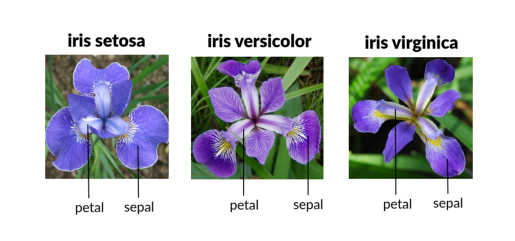

In [212]:
img = mpimg.imread('florecitas.png')
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

In [249]:
lista_modelos = glob.glob('./*.pkl')
lista_tiempos = []
df_modelos    = pd.DataFrame();
df_modelos["direccion_modelo"] = lista_modelos
df_modelos["nombre_modelo"]    = [i.replace(".pkl","").replace("./","") for i in df_modelos["direccion_modelo"]]
for i in lista_modelos:lista_tiempos.append(datetime.datetime.fromtimestamp(os.path.getctime(i)))
df_modelos["fecha creación"] = lista_tiempos
df_modelos


,direccion_modelo,nombre_modelo,fecha creación
0,./prueba_rf.pkl,prueba_rf,2022-12-04 18:18:01.137882
1,./prueba_xg.pkl,prueba_xg,2022-12-04 18:18:06.915923


In [284]:
nombre_modelo_origin = "prueba_xg"
nombre_modelo = f"{nombre_modelo_origin}.pkl"
dic           = {0:'Iris-setosa',1:'Iris-versicolor',2:'Iris-virginica'}
try:
    #cargamos el modelo
    modelo_cargado = pickle.load(open(nombre_modelo, "rb"))
    #generamos nuestro dataset para predecir
    df_pred        = pd.DataFrame()
    df_pred["id"]  = 100
    df_pred["sepallengthcm"] = [4]
    df_pred["sepalwidthcm"] =  [3]
    df_pred["petallengthcm"] = [2]
    df_pred["petalwidthcm"] =  [1] 
    prediccion     = modelo_cargado.predict(df_pred)
    proba          = str(round(modelo_cargado.predict_proba(df_pred)[0][prediccion[0]],2)*100)[0:4]
    pred           = dic[prediccion[0]]
    return f"Modelo {nombre_modelo_origin} predijo que es de la clase {pred} con una probabilidad del {proba} %!"
except Exception as e:
    print(e)
    mensaje =  "No hay ningun modelo guardado con ese nombre :("
    return mensaje
    


Modelo prueba_xg predijo que es de la clase Iris-setosa con una probabilidad del 99.0 %!
